In [4]:
!pip install seaborn

In [10]:
# Bibliotecas
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

#Biblioteca de algoritimos
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [15]:
# Importar dataset
df = pd.read_csv('https://raw.githubusercontent.com/lucheol/in243/master/projeto/bananas.csv')
df.head()

,temperatura,humidade,cor,pronto_para_consumo
0,9.590963,97.007535,verde,NAO
1,18.081287,96.467236,verde,NAO
2,12.884049,95.604222,amarela,SIM
3,18.831052,96.641953,amarela,NAO
4,13.539014,92.978037,preta,NAO


In [16]:
# Quantidade de cores
df['cor'].unique()

array(['verde', 'amarela', 'preta'], dtype=object)

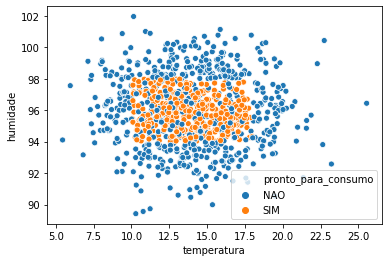

In [17]:
#Separar visualização em 2D por cor
sns.scatterplot(x='temperatura', y='humidade', hue='pronto_para_consumo', data=df)
# A principio é possível padrão por temperatura e umidade se a banana está pronta para o consumo, porém sem levar em conta a cor dela

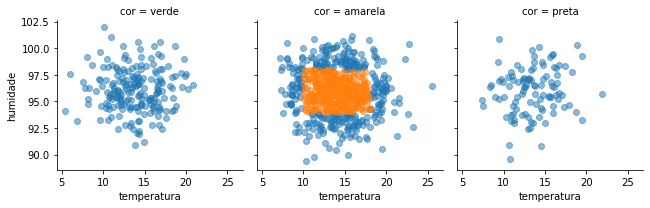

In [18]:
plot = sns.FacetGrid(df, hue='pronto_para_consumo', col='cor')
plot.map(plt.scatter, "temperatura", "humidade", alpha=.5)

In [19]:
# Tratando os dados
swap = {
    'SIM': 1,
    'NAO': 0
}
df['pronto_para_consumo'] = df['pronto_para_consumo'].map(swap)
df_t = df['cor'].str.get_dummies()
df_t.head()

,amarela,preta,verde
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,0,1,0


In [20]:
#Concatenar dados e rearanjar
df_org = pd.concat([df, df_t], axis=1)
df_org = df_org.drop(columns=['cor'])
df_org = df_org[['temperatura', 'humidade', 'verde', 'amarela', 'preta', 'pronto_para_consumo']]
df_org.head()

,temperatura,humidade,verde,amarela,preta,pronto_para_consumo
0,9.590963,97.007535,1,0,0,0
1,18.081287,96.467236,1,0,0,0
2,12.884049,95.604222,0,1,0,1
3,18.831052,96.641953,0,1,0,0
4,13.539014,92.978037,0,0,1,0


In [21]:
#Organizar os dados para o modelo
x=df_org[['temperatura', 'humidade', 'verde', 'amarela', 'preta']]
y=df_org[['pronto_para_consumo']]

In [22]:
#Aplicando modelo LINEAR SVC - BASELINE
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, 
                                                        random_state=20, 
                                                        test_size=0.25,
                                                        stratify=y
                                                       )

model = LinearSVC(random_state=20)
model.fit(treino_x, treino_y)
previsoes = model.predict(teste_x)
taxa_acuracia = accuracy_score(teste_y, previsoes)
print(f"Acurracy: {taxa_acuracia*100}")

Acurracy: 69.6


C:\Users\zcass\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\zcass\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [23]:
# BASELINE UTILIZANDO DUMMYCLASSIFIER
from sklearn.dummy import DummyClassifier
dummy_stratified = DummyClassifier()
dummy_stratified.fit(treino_x, treino_y)
dummy_stratified.score(teste_x, teste_y) * 100



52.400000000000006

In [24]:
#Aplicando modelo LINEAR SVC - BASELINE
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, 
                                                        random_state=20, 
                                                        test_size=0.25,
                                                        stratify=y
                                                       )

scaler = StandardScaler()
scaler.fit(raw_treino_x)

treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

model = LinearSVC(random_state=20)
model.fit(treino_x, treino_y)
previsoes = model.predict(teste_x)
taxa_acuracia = accuracy_score(teste_y, previsoes)
print(f"Acurracy: {taxa_acuracia*100}")

Acurracy: 73.2


C:\Users\zcass\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
#Aplicando modelo SVC - BASELINE
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, 
                                                        random_state=20, 
                                                        test_size=0.25,
                                                        stratify=y
                                                       )

model = SVC(random_state=20)
model.fit(treino_x, treino_y)
previsoes = model.predict(teste_x)

taxa_acuracia = accuracy_score(teste_y, previsoes)
print(f"Acurracy: {taxa_acuracia*100}")

Acurracy: 97.2


C:\Users\zcass\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\zcass\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [30]:
#Aplicando modelo SVC - BASELINE
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, 
                                                        random_state=20, 
                                                        test_size=0.25,
                                                        stratify=y
                                                       )

scaler = StandardScaler()
scaler.fit(raw_treino_x)

treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

model = SVC(random_state=20)
model.fit(treino_x, treino_y)
previsoes = model.predict(teste_x)

taxa_acuracia = accuracy_score(teste_y, previsoes)
print(f"Acurracy: {taxa_acuracia*100}")

Acurracy: 94.39999999999999


C:\Users\zcass\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [90]:
#Aplicando modelo DECISION TREE - BASELINE

treino_x, teste_x, treino_y, teste_y = train_test_split(x,y, test_size=0.25, stratify=y)



model = DecisionTreeClassifier()
model.fit(treino_x, treino_y)
previsoes = model.predict(teste_x)
accuracy_score(teste_y, previsoes) * 100

99.2

In [34]:
#Aplicando modelo DECISION TREE

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, 
                                                        random_state=20, 
                                                        test_size=0.25,
                                                        stratify=y
                                                       )

scaler = StandardScaler()
scaler.fit(raw_treino_x)

treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)


model = DecisionTreeClassifier()
model.fit(treino_x, treino_y)
previsoes = model.predict(teste_x)
accuracy_score(teste_y, previsoes) * 100

99.2

In [ ]:
# O valor do Decision Tree permaneceu o mesmo no algoritimo normal e com ele escalado